In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

Lecture Notes:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128,activation='tanh'))
model.add(Dense(2))

opt = Adam(learning_rate=0.05)
model.compile(optimizer=opt,loss='mse',metrics=['mape'])
history = model.fit(inputs,targets,validation_split=0.2)

print(history.history.keys()) #dict_keys(['loss','mape','val_loss','val_mape'])

In [ ]:
#Example 1
import tensorflow as tf
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()
model.fit(X_train,y_train,validation_data=(X_test,y_test))

In [ ]:
#Example 2
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.1)
model.fit(X_train,y_train,validation_data=(X_val,y_val))

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables
print(diabetes_dataset.keys())


dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets


array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data,test_data,train_targets,test_targets = train_test_split(data,targets,test_size=0.1)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)


(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128,activation="relu",input_shape=(train_data.shape[1],)),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(128,activation="relu"),
        Dense(1)
    ])
    return model

model = get_model()    

In [8]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [10]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data,train_targets,epochs=100,
                    validation_split=0.15,batch_size=64,verbose=False)


In [11]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 1.1926 - mae: 0.7788


[1.0022804578145346, 0.77881277]

#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

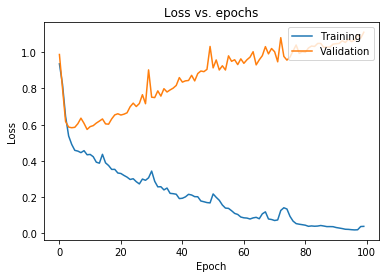

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

Lecture Notes:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
#coefficient 0.001 that multiplies the sum of squared weights in this layer, 
#has the effect of penalizing large values of the weights, which encourges the model to find
#the simpler function that fits the data. This means the model is less likely to overfit the training set.    
    Dense(64,activation='relu',
         kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#the penalty term is a sum of absolute weight values,instead of a sum of squared weight values
#L1 regularization has the effect of sparsifying the network weights. In other words, some of those weights being set to 0.    
        #kernel_regularizer=tf.keras.regularizers.l1(0.005),
#Use both L1 and L2 regularization:
        #kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.005,l2=0.001),
    Dense(1,activation='sigmoid')
])

#The weight decay penalty term is automatically added to the loss function when we compile the model
model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['acc'])
model.fit(inputs,targets,validation_split=0.25)



In [ ]:
#Optional bias regularization:
model = Sequential([
    Dense(64,activation='relu',
         kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.005,l2=0.001),
         bias_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['acc'])

model.fit(inputs,targets,validation_split=0.25) #training mode,with dropout
model.evaluate(val_inputs,val_targets) #testing mode, no dropout
model.predict(test_inputs) #testing mode, no dropout

In [1]:
#Dropouts has a regularizing effect in neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64,activation='relu'),
    Dropout(0.5) #dropout rate: each weight connection between these two dense layers is set to zero with probability 0.5
])

### Adding regularisation with weight decay and dropout

   ### Reducing Overfitting of a Neural Network Model

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularised_model(wd, rate): #weight decay, dropout rates
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5,0.3)

In [17]:
# Compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [18]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data,train_targets,epochs=100,
                   validation_split=0.15,batch_size=64,verbose=False)

In [19]:
# Evaluate the model on the test set
model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.5875 - mae: 0.5872


[0.6070276578267415, 0.5872208]

#### Plot the learning curves

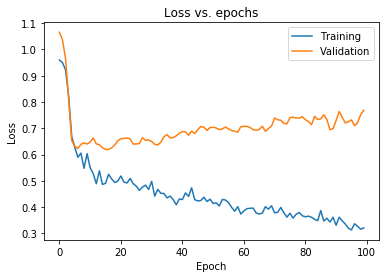

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Class Notes

In [ ]:
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    def on_train_begin(self,logs=None):
        #Do sth at the start of training
    def on_train_batch_begin(self,batch,logs=None):
        #Do sth at the start of every bach iteration
    def on_epoch_end(self,epoch,logs=None):
        #Do sth at the end of every epoch

history = model.fit(X_train,y_train,epochs=5,callbacks=[my_callback()])        

#### Example training callback

In [21]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

#Define a custom callback that will print feedback at various points during training 
#This callback will be a child class of the callback class
class TrainingCallback(Callback):
    
    def on_train_begin(self,logs=None):
        print("Starting training....")
    
    def on_epoch_begin(self,epoch,logs=None):
        print(f"Starting epoch {epoch}")
    
    def on_train_batch_begin(self,batch,logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self,batch,logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self,epoch,logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self,logs=None):
        print("Finished training!")


In [22]:
from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
    def on_test_begin(self,logs=None):
        print("Starting testing....")
    
    def on_test_batch_begin(self,batch,logs=None):
        print(f"Testing:Starting batch {batch}")
    
    def on_test_batch_end(self,batch,logs=None):
        print(f"Testing:Finished batch {batch}")
        
    def on_test_end(self,logs=None):
        print("Finished testing!")

In [23]:
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
    def on_predict_begin(self,logs=None):
        print("Starting prediction....")
    
    def on_predict_batch_begin(self,batch,logs=None):
        print(f"Prediction:Starting batch {batch}")
    
    def on_predict_batch_end(self,batch,logs=None):
        print(f"Prediction:Finished batch {batch}")
        
    def on_predict_end(self,logs=None):
        print("Finished prediction!")

In [24]:
# Re-build the model
model = get_regularised_model(1e-5,0.3)


In [25]:
# Compile the model
model.compile(optimizer="adam",loss="mse")


#### Train the model with the callback

In [26]:
# Train the model, with some of the data reserved for validation
model.fit(train_data,train_targets,epochs=3,batch_size=128,
         verbose=False,callbacks=[TrainingCallback()])


Starting training....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [27]:
# Evaluate the model
model.evaluate(test_data,test_targets,verbose=False,callbacks=[TestingCallback()])



Starting testing....
Testing:Starting batch 0
Testing:Finished batch 0
Testing:Starting batch 1
Testing:Finished batch 1
Finished testing!


1.204070931010776

In [28]:
# Make predictions with the model
model.predict(test_data,verbose=False,callbacks=[PredictionCallback()])


Starting prediction....
Prediction:Starting batch 0
Prediction:Finished batch 0
Prediction:Starting batch 1
Prediction:Finished batch 1
Finished prediction!


array([[ 0.03622442],
       [ 0.03062099],
       [-0.01745171],
       [ 0.04161765],
       [ 0.01508345],
       [ 0.04697425],
       [ 0.03743455],
       [-0.03208413],
       [-0.04015873],
       [ 0.05659414],
       [ 0.02229412],
       [ 0.01729197],
       [ 0.0432718 ],
       [ 0.00198247],
       [-0.02030842],
       [ 0.03374169],
       [ 0.04005742],
       [-0.03829373],
       [-0.06351904],
       [ 0.02682633],
       [-0.05064807],
       [ 0.03568869],
       [-0.02545316],
       [-0.06399428],
       [ 0.02973361],
       [-0.05877853],
       [ 0.02973356],
       [-0.0599613 ],
       [-0.00791544],
       [-0.04519379],
       [ 0.04127167],
       [ 0.01208664],
       [-0.01786005],
       [ 0.02585065],
       [ 0.03617677],
       [ 0.0453345 ],
       [ 0.04126209],
       [ 0.0191985 ],
       [ 0.04155843],
       [-0.02313726],
       [ 0.0216191 ],
       [-0.05862369],
       [-0.03719255],
       [-0.02093762],
       [ 0.01145787]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Lecture Note

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

#2D input: a univariate time series of length 128
model = Sequential([
    Conv1D(16,5,activation='relu',input_shape=(128,1)),
    MaxPooling1D(4),
    Flatten(),
    Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#create an object of earlystopping
#option 1: default performance measure to decide when to terminate training;
#default patience is 0, that means as soon as the performance measure gets worse from one epoch to the nest,
#then the training is terminated, it's not ideal since the model's performace is noisy, and it might go up or down
#from one epoch to the next. What we care is the general trend should be improving
#default min_delta means any improvement in the performance is enough to reset the patience
early_stopping = EarlyStopping(monitor='val_loss',patience=0,min_delta=0) 
#option 2:
#the actual string name passed into the monitor argument here 
#is the same as the string that's used as one of the keys in
#the history object that's returned from model.fit. So that's one way that you can
#check what string you should be using here.
early_stopping = EarlyStopping(monitor='val_accuracy',patience=5,min_delta=0.01,mode='max')
#patience:only terminate if there is no improvement in the monitor performance measure for 5 epochs in a row
#min_delta: the validation accuracy has to improved by at least 0.01 for it to count as an improvement
#mode:max: maximize the monitored performance measure, which is the validation accuracy

model.fit(X_train,y_train,validation_split=0.2,epochs=100,
         callbacks=[early_stopping])

#### Re-train the models with early stopping

In [40]:
# Re-train the unregularised model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam',loss='mse')
unreg_history = unregularised_model.fit(train_data,train_targets,epochs=100,
                                       validation_split=0.15,batch_size=64,verbose=False,
                                       callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])


In [41]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.6698


0.7003436962763468

In [43]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer='adam',loss='mse')
reg_history = regularised_model.fit(train_data,train_targets,epochs=100,
                                   validation_split=0.15,batch_size=64,verbose=False,
                                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [44]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data,test_targets,verbose=2)


45/1 - 0s - loss: 0.5458


0.5299852887789408

#### Plot the learning curves

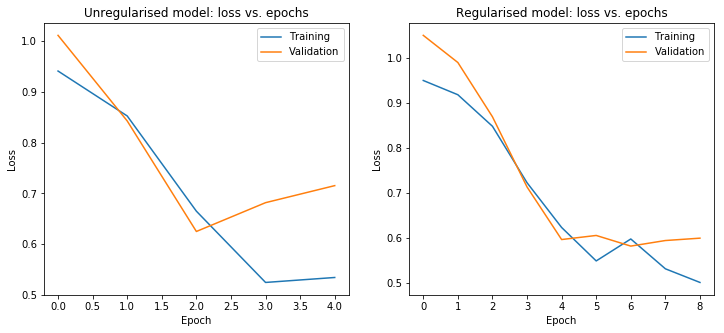

In [45]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()